# Data Preprocessing <br>

* ### Handling Missing Data <br>
* ### Encoding Independent Variables <br>
    *OneHotEncoder* <br>
* ### Encoding Dependent Variable <br>
    *LabelEncoder* <br>
* ### Train - Test Split <br>
* ### Feature Scaling <br>
    *Standardisation*

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Data.csv')

In [3]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# Handling Missing Data

In [4]:
mean = data['Salary'].mean()

In [5]:
data['Salary'] = data['Salary'].fillna(mean)

In [6]:
median = data['Age'].median()

In [7]:
data['Age'] = data['Age'].fillna(median)

In [8]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,No
1,Spain,27.0,48000.000000,Yes
2,Germany,30.0,54000.000000,No
3,Spain,38.0,61000.000000,No
4,Germany,40.0,63777.777778,Yes
5,France,35.0,58000.000000,Yes
6,Spain,38.0,52000.000000,No
7,France,48.0,79000.000000,Yes
8,Germany,50.0,83000.000000,No
9,France,37.0,67000.000000,Yes


In [9]:
data['Salary'] = data['Salary'].astype(int)

In [10]:
data['Age'] = data['Age'].astype(int)

In [11]:
data

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,63777,Yes
5,France,35,58000,Yes
6,Spain,38,52000,No
7,France,48,79000,Yes
8,Germany,50,83000,No
9,France,37,67000,Yes


In [12]:
x_data = data.iloc[:, :-1]
y_data = data['Purchased']

# Encoding Independent Variables

https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621#:~:text=What%20one%20hot%20encoding%20does,which%20column%20has%20what%20value.&text=So%2C%20that's%20the%20difference%20between%20Label%20Encoding%20and%20One%20Hot%20Encoding.

### - **OneHotEncoder**

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
ohc = OneHotEncoder()

In [15]:
c = pd.DataFrame(ohc.fit_transform(data[['Country']]).toarray())

In [16]:
x_data = pd.concat([c, x_data], axis=1)

In [17]:
x_data

,0,1,2,Country,Age,Salary
0,1.0,0.0,0.0,France,44,72000
1,0.0,0.0,1.0,Spain,27,48000
2,0.0,1.0,0.0,Germany,30,54000
3,0.0,0.0,1.0,Spain,38,61000
4,0.0,1.0,0.0,Germany,40,63777
5,1.0,0.0,0.0,France,35,58000
6,0.0,0.0,1.0,Spain,38,52000
7,1.0,0.0,0.0,France,48,79000
8,0.0,1.0,0.0,Germany,50,83000
9,1.0,0.0,0.0,France,37,67000


In [18]:
x_data = x_data.drop(['Country'], axis=1)

# Encoding Dependent Variable

### - **LabelEncoder**

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
y = le.fit_transform(y_data)

In [22]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# Train - Test Split

In [23]:
from sklearn.model_selection import train_test_split 

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y, test_size=0.2, random_state=1)

In [25]:
xtrain

,0,1,2,Age,Salary
6,0.0,0.0,1.0,38,52000
4,0.0,1.0,0.0,40,63777
0,1.0,0.0,0.0,44,72000
3,0.0,0.0,1.0,38,61000
1,0.0,0.0,1.0,27,48000
7,1.0,0.0,0.0,48,79000
8,0.0,1.0,0.0,50,83000
5,1.0,0.0,0.0,35,58000


# Feature Scaling

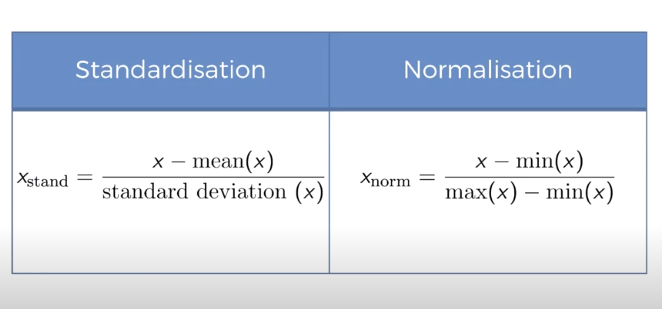

#### 1. Standardisation :  values between -3 and 3 (works all the time)
####  2. Normalisation : values between 0 and 1 (recommended only when features follows normal distribution)

- remember to apply feature scaling after train test split
- feature scaling does not need to be applied on dummy variables as they already have values between -3 and 3

In [26]:
from sklearn.preprocessing import StandardScaler 

In [27]:
sc = StandardScaler()

In [28]:
xtrain.iloc[:, 3:] = sc.fit_transform(xtrain.iloc[:, 3:])

C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [29]:
xtrain

,0,1,2,Age,Salary
6,0.0,0.0,1.0,-0.289430,-1.078117
4,0.0,1.0,0.0,0.000000,-0.070190
0,1.0,0.0,0.0,0.578860,0.633570
3,0.0,0.0,1.0,-0.289430,-0.307858
1,0.0,0.0,1.0,-1.881294,-1.420454
7,1.0,0.0,0.0,1.157719,1.232661
8,0.0,1.0,0.0,1.447149,1.574998
5,1.0,0.0,0.0,-0.723575,-0.564611


In [30]:
xtest.iloc[:, 3:] = sc.transform(xtest.iloc[:, 3:])

C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
